<a href="https://colab.research.google.com/github/vgc280683/PIA01_vgc280683/blob/main/Clasificacion_comentarios_con_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de clasificación de valoraciones de películas con deep learning

Trabajamos con el dataset IMDB, que ya viene preprocesado y el texto se ha codificado como una secuencia de números enteros.

Viene precargado en la librería Keras: https://keras.io/api/datasets/imdb/

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


Vemos que train_data y test_data son listas de índices correspondientes a palabras presentes en una review de una película

In [ ]:
print("Los 10 primeros tokens del comentario con índice 0 son: ")
print(train_data[0][:10])

Los 10 primeros tokens del comentario con índice 0 son: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]


Por otro lado, train_labels y test_labels son listas de 0 y 1, correspondiendo el 0 a una valoración negativa y el 1 a una valoración positiva

In [ ]:
train_labels[0]

1

El módulo incluye la función get_word_index, que es la que codifica el texto a índices. El criterio de codificación asigna a cada palabra el número entero correspondiente al orden que ocupa dicha palabra en cuanto a frecuencia de aparición en el dataset. Para recuperar el texto literal, invertimos índices y valores tras aplicar la función.

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparamos los datos de entrada
No podemos introducir en la red neuronal listas de diferente longitud. Las redes neuronales solo aceptan tensores, y tenemos que "vectorizar" las listas de los comentarios haciendo un "one_hot encoding"

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
len(x_train)

25000

In [ ]:
x_train[0].shape

(10000,)

Convertimos en array también las etiquetas y

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Construimos el modelo
Creamos un modelo Sequential con 3 capas neuronales, dos de 16 neuronas y la de salida con 1 neurona, pues es un problema de clasificación binario

In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

## Fijamos los parámetros del entrenamiento
Podemos ustilizar el módulo optimizers para fijar parámetros internos del optimizador.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

Reservamos datos para la validación.

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Entrenamos el modelo

In [ ]:
training=model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5102 - acc: 0.7912 - val_loss: 0.4192 - val_acc: 0.8361
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3111 - acc: 0.9005 - val_loss: 0.3206 - val_acc: 0.8777
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2278 - acc: 0.9277 - val_loss: 0.2929 - val_acc: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1807 - acc: 0.9415 - val_loss: 0.2725 - val_acc: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1489 - acc: 0.9532 - val_loss: 0.2877 - val_acc: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1208 - acc: 0.9621 - val_loss: 0.3016 - val_acc: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0988 - acc: 0.9713 - val_loss: 0.3122 - val_acc: 0.8837
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0811 - a

## Representamos la evolución del error y la precisión en cada epoch

In [ ]:
history_dict = training.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

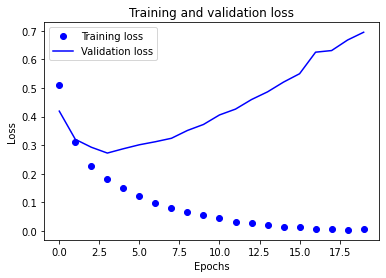

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
#epochs = range(1, len(history_dict['acc']) +1)
epochs = training.epoch
plt.plot(epochs, loss_values,'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt. title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

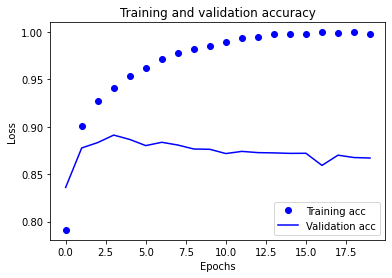

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

En el momento en que la precisión del modelo con los datos de entrenamiento aumenta pero la de los datos de validación no, tenemos indicios de que se está dando lo que se denomina "overfitting". Volvemos a entrenar un nuevo modelo pero, esta vez, solo con 5 epochs

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

training=model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/5
30/30 [==============================] - 2s 45ms/step - loss: 0.5109 - acc: 0.7905 - val_loss: 0.3790 - val_acc: 0.8725
Epoch 2/5
30/30 [==============================] - 1s 32ms/step - loss: 0.3043 - acc: 0.9006 - val_loss: 0.3135 - val_acc: 0.8777
Epoch 3/5
30/30 [==============================] - 1s 36ms/step - loss: 0.2218 - acc: 0.9281 - val_loss: 0.2768 - val_acc: 0.8939
Epoch 4/5
30/30 [==============================] - 1s 31ms/step - loss: 0.1755 - acc: 0.9429 - val_loss: 0.3125 - val_acc: 0.8751
Epoch 5/5
30/30 [==============================] - 1s 34ms/step - loss: 0.1448 - acc: 0.9533 - val_loss: 0.2965 - val_acc: 0.8840


Probamos a hacer una predicción

In [ ]:
prediction = model.predict(x_test)

In [ ]:
prediction[0]

array([0.30326813], dtype=float32)

In [ ]:
y_test[0]

0.0

In [ ]:
%%shell
jupyter nbconvert --to html /content/Mod3_T3_5_Ejercicio_Clasificacion_comentarios_con_DL.ipynb

[NbConvertApp] Converting notebook /content/Mod3_T3_5_Ejercicio_Clasificacion_comentarios_con_DL.ipynb to html
[NbConvertApp] Writing 341379 bytes to /content/Mod3_T3_5_Ejercicio_Clasificacion_comentarios_con_DL.html
